In [1]:
import pandas as pd
import numpy as np
import sqlite3
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv("data/countyelectiondata.csv")

C:\Users\toomuchdust\AppData\Local\Programs\Python\Python39\lib\site-packages\IPython\core\interactiveshell.py:3266: DtypeWarning: Columns (5,6,7,9,11,14,15,16,18,20) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


In [3]:
df["group"] =pd.cut(df['election_year'],
                     bins=[1960, 1972, 1984, 1996, 2008, 2020],
                     labels=['group 1', 'group 2', 'group 3', 'group 4', "group 5"])

In [4]:
df

,election_year,fips,county_name,state,sfips,office_x,election_type_x,gov_seat_status,gov_democratic_raw_votes,gov_dem_nominee,...,office,election_type,pres_seat_status,pres_democratic_raw_votes,pres_dem_nominee,pres_republican_raw_votes,rep_nominee,pres_raw_county_vote_totals_two_party,pres_raw_county_vote_totals,group
0,1962,1001,AUTAUGA,AL,1,GOV,G,Democratic Open Seat Uncontested by Republicans,1594.0,George C. Wallace,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,group 1
1,1966,1001,AUTAUGA,AL,1,GOV,G,Democratic Open Seat,4664.0,Lurleen B. Wallace,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,group 1
2,1970,1001,AUTAUGA,AL,1,GOV,G,Democratic Open Seat Uncontested by Republicans,5206.0,George C. Wallace,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,group 1
3,1974,1001,AUTAUGA,AL,1,GOV,G,Democratic Incumbent,3868.0,George C. Wallace,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,group 2
4,1978,1001,AUTAUGA,AL,1,GOV,G,Democratic Open Seat,4948.0,Forrest H. Jr. James,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,group 2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
100872,1968,56045,WESTON,WY,56,NaN,NaN,NaN,NaN,NaN,...,PRES,G,Open Seat,610.0,Herbert H. Humphrey,1497.0,Richard M. Nixon,2107.0,2373.0,group 1
100873,1980,56045,WESTON,WY,56,NaN,NaN,NaN,NaN,NaN,...,PRES,G,Democratic President Re-election,584.0,Jimmy Carter,2219.0,Ronald Reagan,2803.0,2970.0,group 2
100874,1992,56045,WESTON,WY,56,NaN,NaN,NaN,NaN,NaN,...,PRES,G,Republican President Re-election,727.0,Bill Clinton,1465.0,George H.W. Bush,2192.0,3027.0,group 3
100875,2004,56045,WESTON,WY,56,NaN,NaN,NaN,NaN,NaN,...,PRES,G,Republican President Re-election,580.0,John F. Kerry,2739.0,George W. Bush,3319.0,3392.0,group 4


In [5]:
df.rename(columns={"group": "era"}, inplace=True)
df.columns

Index(['election_year', 'fips', 'county_name', 'state', 'sfips', 'office_x',
       'election_type_x', 'gov_seat_status', 'gov_democratic_raw_votes',
       'gov_dem_nominee', 'gov_republican_raw_votes', 'gov_rep_nominee',
       'gov_raw_county_vote_totals_two_party', 'gov_raw_county_vote_totals',
       'office_y', 'election_type_y', 'sen_seat_status',
       'sen_democratic_raw_votes', 'sen_dem_nominee',
       'sen_republican_raw_votes', 'sen_rep_nominee',
       'senate_raw_county_vote_totals_two_party', 'sen_raw_county_vote_totals',
       'office', 'election_type', 'pres_seat_status',
       'pres_democratic_raw_votes', 'pres_dem_nominee',
       'pres_republican_raw_votes', 'rep_nominee',
       'pres_raw_county_vote_totals_two_party', 'pres_raw_county_vote_totals',
       'era'],
      dtype='object')

In [19]:
df[(df["county_name"] == "DANE") & (df['state'] == "WI")]

,election_year,fips,county_name,state,sfips,office_x,election_type_x,gov_seat_status,gov_democratic_raw_votes,gov_dem_nominee,...,office,election_type,pres_seat_status,pres_democratic_raw_votes,pres_dem_nominee,pres_republican_raw_votes,rep_nominee,pres_raw_county_vote_totals_two_party,pres_raw_county_vote_totals,era
50980,1960,55025,DANE,WI,55,GOV,G,Democratic Incumbent,56601.0,Gaylord Anton Nelson,...,PRES,G,Open Seat,47045.0,John F. Kennedy,43245.0,Richard M. Nixon,90290.0,90502.0,NaN
50981,1962,55025,DANE,WI,55,GOV,G,Democratic Open Seat,39321.0,John W. Reynolds,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,group 1
50982,1964,55025,DANE,WI,55,GOV,G,Democratic Incumbent,53246.0,John W. Reynolds,...,PRES,G,Elevated Democratic President Election,68118.0,Lyndon B. Johnson,27124.0,Barry Goldwater,95242.0,95426.0,group 1
50983,1966,55025,DANE,WI,55,GOV,G,Republican Incumbent,28214.0,Patrick J. Lucey,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,group 1
50984,1968,55025,DANE,WI,55,GOV,G,Republican Incumbent,49758.0,Bronson C. Lafollette,...,PRES,G,Open Seat,59951.0,Herbert H. Humphrey,39917.0,Richard M. Nixon,99868.0,104904.0,group 1
50985,1970,55025,DANE,WI,55,GOV,G,Republican Open Seat,49868.0,Patrick J. Lucey,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,group 1
50986,1974,55025,DANE,WI,55,GOV,G,Democratic Incumbent,50648.0,Patrick J. Lucey,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,group 2
50987,1978,55025,DANE,WI,55,GOV,G,Democratic Incumbent,54916.0,Martin J. Schreiber,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,group 2
50988,1982,55025,DANE,WI,55,GOV,G,Republican Open Seat,86228.0,Anthony S. Earl,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,group 2
50989,1986,55025,DANE,WI,55,GOV,G,Democratic Incumbent,76204.0,Anthony S. Earl,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,group 3


In [20]:
df[(df["county_name"] == "DANE") & (df['state'] == "WI")]["fips"]

50980     55025
50981     55025
50982     55025
50983     55025
50984     55025
50985     55025
50986     55025
50987     55025
50988     55025
50989     55025
50990     55025
50991     55025
50992     55025
50993     55025
50994     55025
50995     55025
50996     55025
50997     55025
87931     55025
87932     55025
87933     55025
87934     55025
87935     55025
87936     55025
87937     55025
87938     55025
100462    55025
100463    55025
100464    55025
100465    55025
100466    55025
Name: fips, dtype: int64

In [6]:
columns_to_calculate = ['gov_democratic_raw_votes', 'gov_republican_raw_votes', 'gov_raw_county_vote_totals_two_party',
                        'sen_democratic_raw_votes', 'sen_republican_raw_votes', 'senate_raw_county_vote_totals_two_party',
                        'pres_democratic_raw_votes', 'pres_republican_raw_votes', 'pres_raw_county_vote_totals_two_party']

# Group by 'group' and 'fips', and calculate mean, std, and variance for specified columns
grouped_df = df.groupby(['era', 'fips'])[columns_to_calculate].agg(['mean', 'std'])

# Flatten the MultiIndex columns
grouped_df.columns = ['_'.join(col).strip() for col in grouped_df.columns.values]

# Reset index to make the group columns as regular columns
grouped_df.reset_index(inplace=True)

# Display the result
grouped_df

,era,fips,gov_democratic_raw_votes_mean,gov_democratic_raw_votes_std,gov_republican_raw_votes_mean,gov_republican_raw_votes_std,gov_raw_county_vote_totals_two_party_mean,gov_raw_county_vote_totals_two_party_std,sen_democratic_raw_votes_mean,sen_democratic_raw_votes_std,sen_republican_raw_votes_mean,sen_republican_raw_votes_std,senate_raw_county_vote_totals_two_party_mean,senate_raw_county_vote_totals_two_party_std,pres_democratic_raw_votes_mean,pres_democratic_raw_votes_std,pres_republican_raw_votes_mean,pres_republican_raw_votes_std,pres_raw_county_vote_totals_two_party_mean,pres_raw_county_vote_totals_two_party_std
0,group 1,1001,3821.333333,1947.870975,553.333333,958.401447,4374.666667,2472.157223,3304.75,1903.413140,1998.25,706.974481,5303.00,2398.626968,2525.000000,2627.064521,2977.666667,2385.011810,5502.666667,1821.938894
1,group 1,1003,9766.333333,4268.647366,1237.333333,2143.124199,11003.666667,5090.443432,8321.75,4572.255853,5526.00,2251.368917,13847.75,5001.591039,6599.666667,6711.398687,9377.000000,6601.362662,15976.666667,2357.976322
2,group 1,1005,4696.000000,2139.091162,216.333333,374.700325,4912.333333,2348.133798,4091.50,2025.263851,1342.00,619.900530,5433.50,2046.803931,2769.000000,2390.126147,3076.000000,2394.013993,5845.000000,1000.293957
3,group 1,1007,3084.333333,1126.923393,263.333333,456.106713,3347.666667,1353.966888,2489.75,1100.711702,1144.00,681.137774,3633.75,1044.554889,1659.333333,1721.694030,2071.666667,1608.500026,3731.000000,541.182964
4,group 1,1009,4581.333333,1911.491913,1132.666667,1961.836215,5714.000000,2972.689691,4428.25,1743.963374,2718.50,913.809791,7146.75,2340.318835,3509.000000,2639.899051,4308.000000,2247.997331,7817.000000,850.739090
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15615,group 5,56037,3715.666667,166.584313,7674.666667,1079.903854,11390.333333,973.666438,3577.25,581.467325,10245.75,2487.307430,13823.00,2884.850429,3942.666667,778.429402,11937.000000,442.399141,15879.666667,434.909569
15616,group 5,56039,4656.666667,1638.003765,4380.333333,369.721968,9037.000000,1970.511609,6241.00,2641.985743,4756.50,841.345153,10997.50,2895.044674,7791.666667,1863.982385,4373.333333,469.336056,12165.000000,1754.752404
15617,group 5,56041,1330.333333,274.117371,4086.666667,724.955401,5417.000000,496.986921,1306.25,296.525856,5852.75,1553.915780,7159.00,1796.864491,1473.666667,235.996469,6755.000000,681.865823,8228.666667,865.589009
15618,group 5,56043,555.000000,49.789557,2337.000000,271.354012,2892.000000,321.112130,509.75,172.872545,2825.25,550.438840,3335.00,672.970034,659.000000,131.183078,3056.666667,171.038982,3715.666667,240.200611


In [17]:

conn = sqlite3.connect(':memory:')


grouped_df.to_sql('my_table', conn, index=False, if_exists='replace')


query = "SELECT * FROM my_table WHERE fips = 55025"


result_df = pd.read_sql_query(query, conn)


print(result_df)


conn.close()

       era   fips  gov_democratic_raw_votes_mean  \
0  group 1  55025                   44081.400000   
1  group 2  55025                   63930.666667   
2  group 3  55025                   68795.666667   
3  group 4  55025                  110993.000000   
4  group 5  55025                  181896.000000   

   gov_democratic_raw_votes_std  gov_republican_raw_votes_mean  \
0                  10297.259480                   42557.000000   
1                  19427.615946                   39947.333333   
2                   6599.561677                   59575.000000   
3                  33924.051836                   57601.666667   
4                  35553.036621                   70373.333333   

   gov_republican_raw_votes_std  gov_raw_county_vote_totals_two_party_mean  \
0                   9230.521275                               86638.400000   
1                  14761.849489                              103878.000000   
2                  10422.502051                         

<bound method _make_class_factory.<locals>.class_factory.<locals>.subcls.set of <AxesSubplot:title={'center':'President Votes (Standard Deviation)'}, xlabel='Era', ylabel='Vote Totals (Standard Deviation)'>>

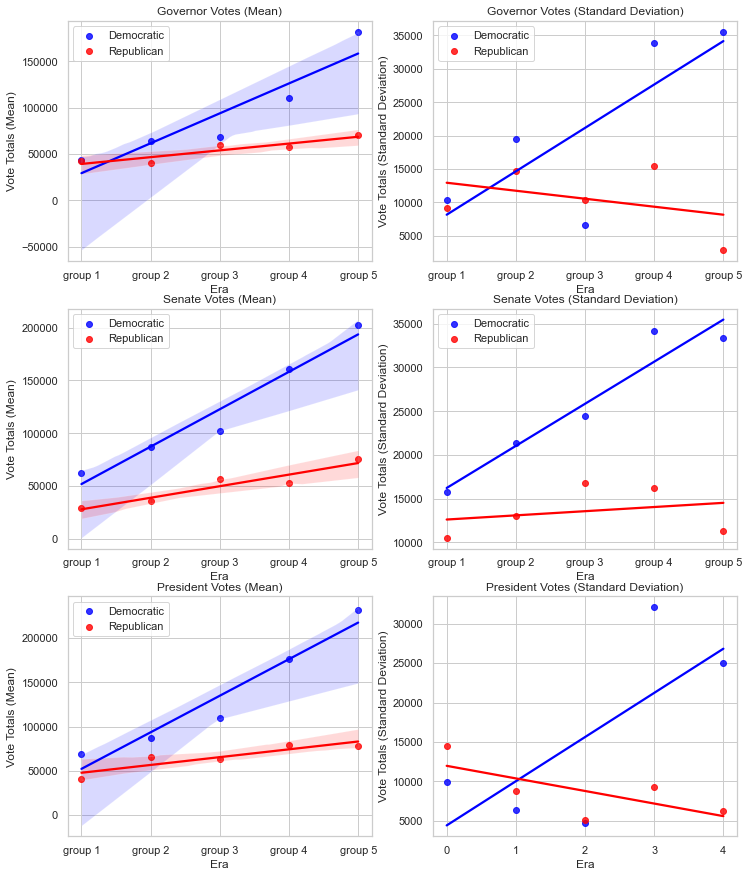

In [18]:
# Assuming 'result_df' is your DataFrame with the calculated values

# Assuming 'result_df' is your DataFrame with the calculated values

# Create a 3x2 grid of subplots (3 rows, 2 columns)
fig, axes = plt.subplots(nrows=3, ncols=2, figsize=(12, 15))

# Create a dummy numeric axis for each unique value in the 'era' column
era_values = result_df['era'].unique()
era_mapping = {value: index for index, value in enumerate(era_values)}

# Apply the mapping to create a numeric 'era_numeric' column
result_df['era_numeric'] = result_df['era'].map(era_mapping)

# Set the style for better aesthetics (optional)
sns.set(style="whitegrid")

# Scatterplot with regression line for Governor Votes (Mean)
sns.regplot(x='era_numeric', y='gov_democratic_raw_votes_mean', data=result_df, label='Democratic', ax=axes[0, 0], color='blue')
sns.regplot(x='era_numeric', y='gov_republican_raw_votes_mean', data=result_df, label='Republican', ax=axes[0, 0], color='red')
axes[0, 0].set_title('Governor Votes (Mean)')
axes[0, 0].set_ylabel('Vote Totals (Mean)')
axes[0, 0].set_xlabel('Era')
axes[0, 0].set_xticks(range(len(era_values)))
axes[0, 0].set_xticklabels(era_values)
axes[0, 0].legend()

# Scatterplot with regression line for Governor Votes (Standard Deviation)
sns.regplot(x='era_numeric', y='gov_democratic_raw_votes_std', data=result_df, label='Democratic', ax=axes[0, 1], color='blue', ci = None)
sns.regplot(x='era_numeric', y='gov_republican_raw_votes_std', data=result_df, label='Republican', ax=axes[0, 1], color='red', ci = None)
axes[0, 1].set_title('Governor Votes (Standard Deviation)')
axes[0, 1].set_xlabel('Era')
axes[0, 1].set_ylabel('Vote Totals (Standard Deviation)')
axes[0, 1].set_xticks(range(len(era_values)))
axes[0, 1].set_xticklabels(era_values)
axes[0, 1].legend()

# Scatterplot with regression line for Senate Votes (Mean)
sns.regplot(x='era_numeric', y='sen_democratic_raw_votes_mean', data=result_df, label='Democratic', ax=axes[1, 0], color='blue')
sns.regplot(x='era_numeric', y='sen_republican_raw_votes_mean', data=result_df, label='Republican', ax=axes[1, 0], color='red')
axes[1, 0].set_title('Senate Votes (Mean)')
axes[1, 0].set_ylabel('Vote Totals (Mean)')
axes[1, 0].set_xlabel('Era')
axes[1, 0].set_xticks(range(len(era_values)))
axes[1, 0].set_xticklabels(era_values)
axes[1, 0].legend()

# Scatterplot with regression line for Senate Votes (Standard Deviation)
sns.regplot(x='era_numeric', y='sen_democratic_raw_votes_std', data=result_df, label='Democratic', ax=axes[1, 1], color='blue', ci = None)
sns.regplot(x='era_numeric', y='sen_republican_raw_votes_std', data=result_df, label='Republican', ax=axes[1, 1], color='red', ci = None)
axes[1, 1].set_title('Senate Votes (Standard Deviation)')
axes[1, 1].set_ylabel('Vote Totals (Standard Deviation)')
axes[1, 1].set_xlabel('Era')
axes[1, 1].set_xticks(range(len(era_values)))
axes[1, 1].set_xticklabels(era_values)
axes[1, 1].legend()

# Scatterplot with regression line for President Votes (Mean)
sns.regplot(x='era_numeric', y='pres_democratic_raw_votes_mean', data=result_df, label='Democratic', ax=axes[2, 0], color='blue')
sns.regplot(x='era_numeric', y='pres_republican_raw_votes_mean', data=result_df, label='Republican', ax=axes[2, 0], color='red')
axes[2, 0].set_title('President Votes (Mean)')
axes[2, 0].set_ylabel('Vote Totals (Mean)')
axes[2, 0].set_xlabel('Era')
axes[2, 0].set_xticks(range(len(era_values)))
axes[2, 0].set_xticklabels(era_values)
axes[2, 0].legend()

# Scatterplot with regression line for President Votes (Standard Deviation)
sns.regplot(x='era_numeric', y='pres_democratic_raw_votes_std', data=result_df, label='Democratic', ax=axes[2, 1], color='blue', ci = None)
sns.regplot(x='era_numeric', y='pres_republican_raw_votes_std', data=result_df, label='Republican', ax=axes[2, 1], color='red', ci = None)
axes[2, 1].set_title('President Votes (Standard Deviation)')
axes[2, 1].set_ylabel('Vote Totals (Standard Deviation)')
axes[2, 1].set_xlabel('Era')
axes[2, 1].set_xticks(range(len(era_values)))
axes[2, 1].set